# Text Data Cleaning

## Introduction

In this part, I used the twitter API to collect tweets data about my topic `personal credit`. After collecting data, 

In [14]:
import tweepy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

This data gathering process was finished by python and used Twitter API to grab some text data from recent tweets. Then I painted a wordcloud to show which words in the topic appear most. It is easy but will be useful to my future work to finish the project.

I'm gonna use the NLP methods to do some sentiment analysis and the result will be discussed in my project portfolio.

In [15]:
consumer_key = 'Apx8TT3mHth1uKedUxcHPiR2Q'
consumer_secret = 'A6vKdRrqHvz9EDL5WJQJMzXwlH7fCUMV8MbQn2ULkwM5XXrVqk'
access_token = '1298010161949421568-UJZh6bAJOv6EJl13VP1cp2wolnPguG'
access_token_secret = 'lwsZju1YqcNbv8B6ETgVGbq6MWn8zNZGpfUfPM6aAwxVr'
bearer_token = "AAAAAAAAAAAAAAAAAAAAAHxTfgEAAAAAFoqGo6ZQ%2BYdXOC8pDIvIgRX0jJM%3DCnfeZi86Klf8HPAGUap5AoUjQN754ki2jjomd4ZhTLtcwGpg6q"

In [16]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [17]:
#Define a search-for-tweets function
def tweetSearch(query, limit = 1000, language = "en", remove = []):
    #Create an empty text holder
    text = ""
    for tweet in tweepy.Cursor(api.search_tweets, q=query, lang=language).items(limit):
        text += tweet.text.lower()
 #Create a list of words to be removed
    removeWords = ["https","co"]
    removeWords += remove
 #Replace the words that you would like to removed with an empty space.
    for word in removeWords:
        text = text.replace(word, "")
    
 #returnclean text
    return text

In [18]:
search = tweetSearch("personal credit")

First filter out all English text with regular expressions, eliminating unwanted characters such as emoticons. Next, use the countvectorizer() method for word frequency statistics.

In [19]:
words = search.split('\n')

In [26]:
import re
reg = re.compile('[A-Za-z0-9]+')
x = reg.findall(search)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
# Create a Vectorizer Object
vectorizer = CountVectorizer()
vectorizer.fit(x)
vector = vectorizer.transform(x)

In [23]:
vocab = vectorizer.vocabulary_

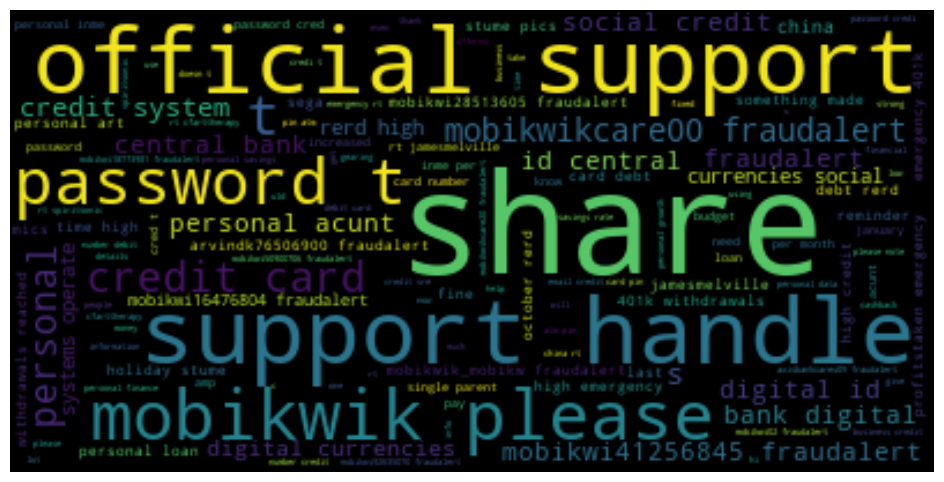

In [24]:
wordcloud = WordCloud().generate(search)
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()